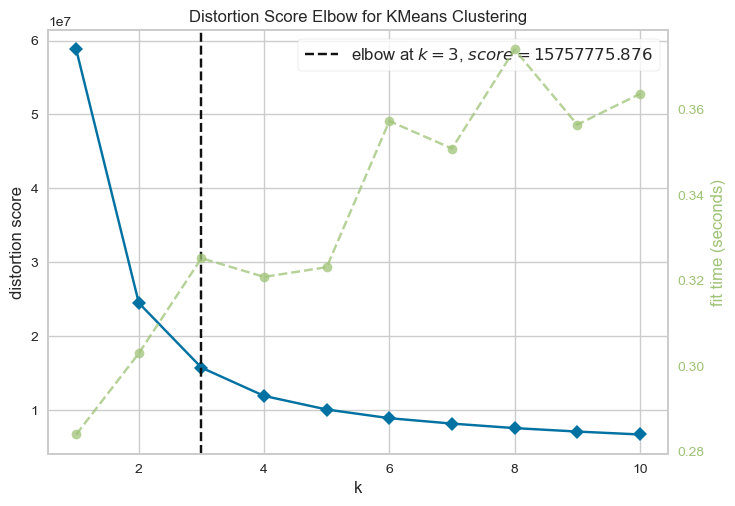

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读取数据
data = pd.read_excel('预处理最终版本.xlsx')

# 只选择需要使用的
features = data[['出生年','身高','体重','腰围','收缩压','舒张压','胆固醇','血糖','尿酸','甘油三酯','高密度脂蛋白','低密度脂蛋白']]

from sklearn.impute import SimpleImputer

# 创建一个填充器，使用均值进行填充
imputer = SimpleImputer(strategy='mean')

# 对特征进行缺失值填充
X = imputer.fit_transform(features)


# 计算不同 K 值对应的损失函数值
inertia = []
# 创建 KMeans 聚类模型，选择簇数量 K 的范围
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model_ori = KMeans()
visualizer = KElbowVisualizer(KMeans(), k = (1, 11)) #k = 1 to 11
visualizer.fit(X)
# plt.savefig('output1.png', dpi=4000, bbox_inches='tight') 
visualizer.show()


In [2]:
# 根据最佳簇数量K进行分类
best_k =4# 假设最佳簇数量为5

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# 将类别标签合并到原始数据中
data_with_labels = pd.concat([data, pd.DataFrame({'Label': labels})], axis=1)

# 按照类别标签进行分类
for label in range(best_k):
    classified_data = data_with_labels[data_with_labels['Label'] == label]
    # 进行相应的操作，比如打印分类结果或保存到文件等
    print(f'分类{label}的数据：')
    print(classified_data)


分类0的数据：
       出生年  性别  文化程度  婚姻状况  职业  是否吸烟  开始吸烟年龄  平均每周吸烟天数  一天吸烟支数  是否被动吸烟  ...  \
4     1968   1     4     2   9     1      20         7      10       1  ...   
8     1947   2     2     3  11     3       0         0       0       1  ...   
15    1968   1     4     2   2     3       0         0       0       1  ...   
20    1976   1     4     1  12     1      20         7      10       2  ...   
21    1969   1     5     2   4     2       0         0       0       2  ...   
...    ...  ..   ...   ...  ..   ...     ...       ...     ...     ...  ...   
7813  1992   2     4     1  13     3       0         0       0       1  ...   
7818  1972   2     3     2   1     3       0         0       0       2  ...   
7820  1964   2     3     2   1     3       0         0       0       1  ...   
7823  1969   1     3     2   9     3       0         0       0       2  ...   
7834  1968   1     3     2   4     2       0         0       0       2  ...   

       食用海草的频率   食用咸菜的频率   食用泡菜的频率   食用酸菜的频

In [35]:
data['cluster']=labels
data.to_excel('output最后一晚.xlsx',index=False)

For n_clusters = 2 The average silhouette_score is : 0.48466791688829425


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For n_clusters = 3 The average silhouette_score is : 0.39905164630744416


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For n_clusters = 4 The average silhouette_score is : 0.3492579119583054


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For n_clusters = 5 The average silhouette_score is : 0.3015150406846502


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For n_clusters = 6 The average silhouette_score is : 0.27788509404483935


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

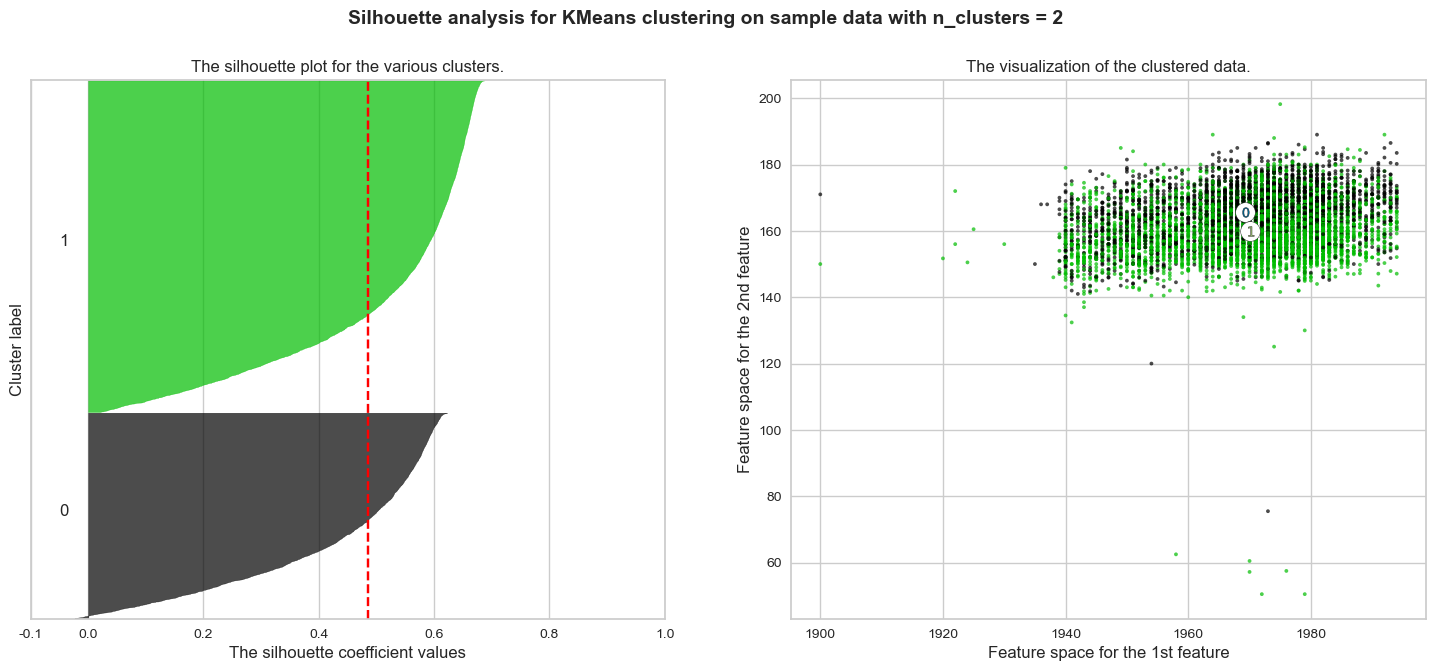

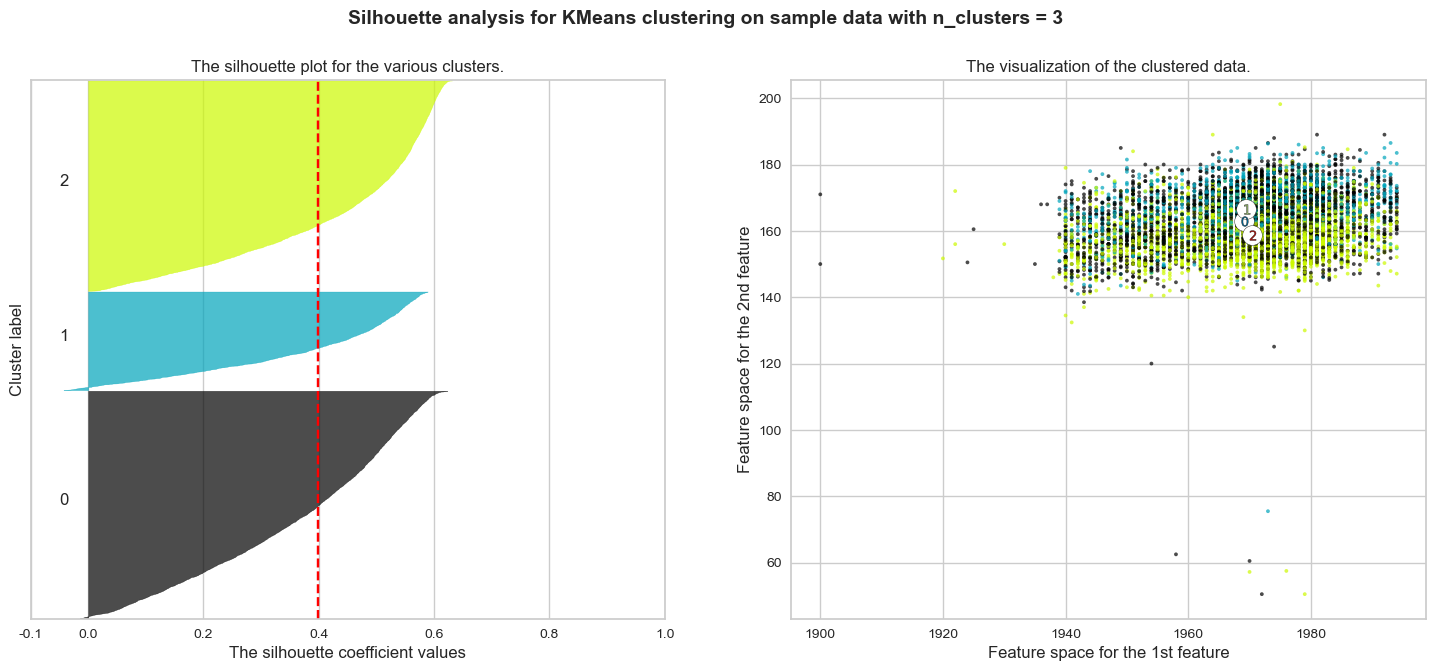

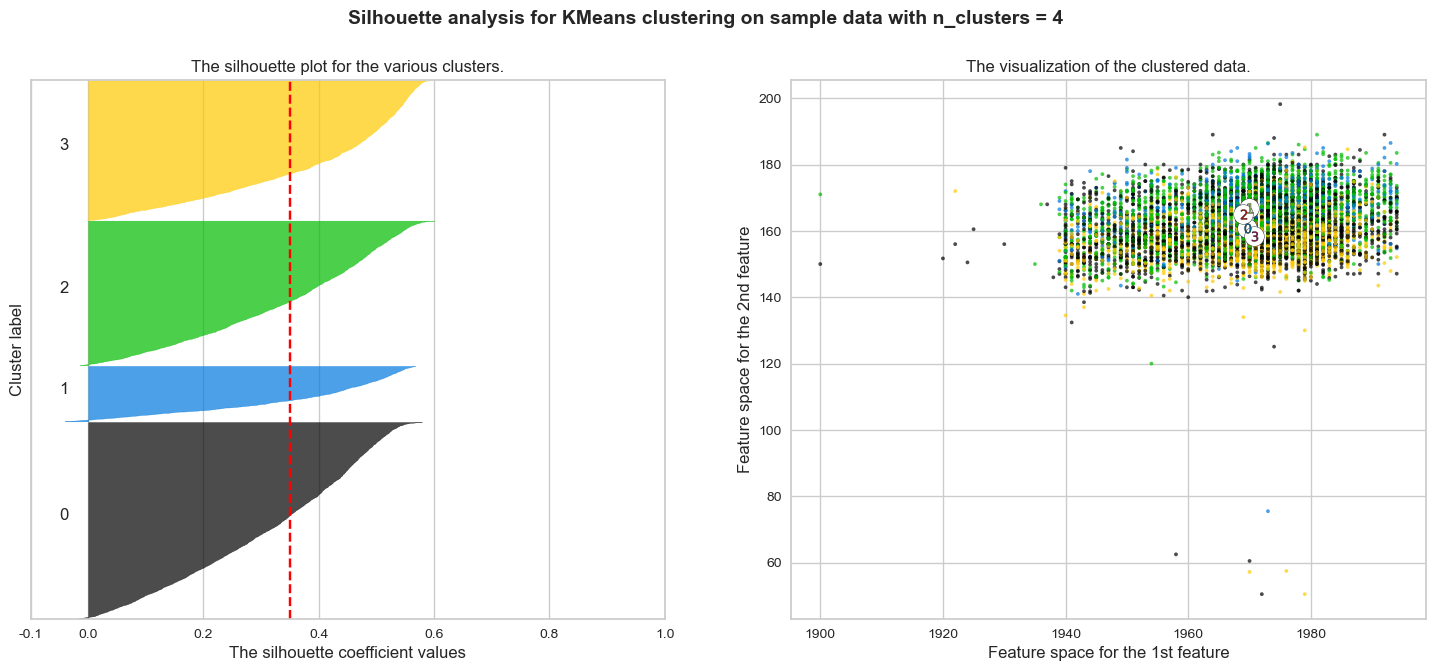

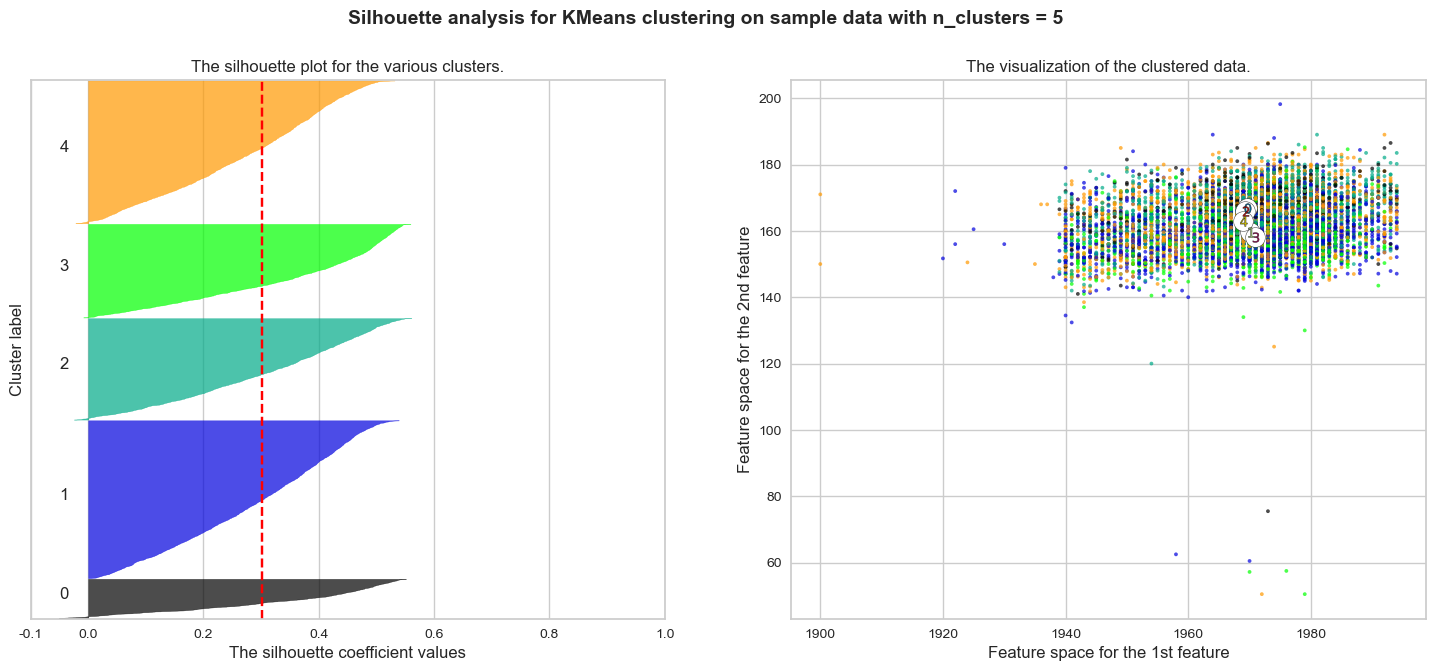

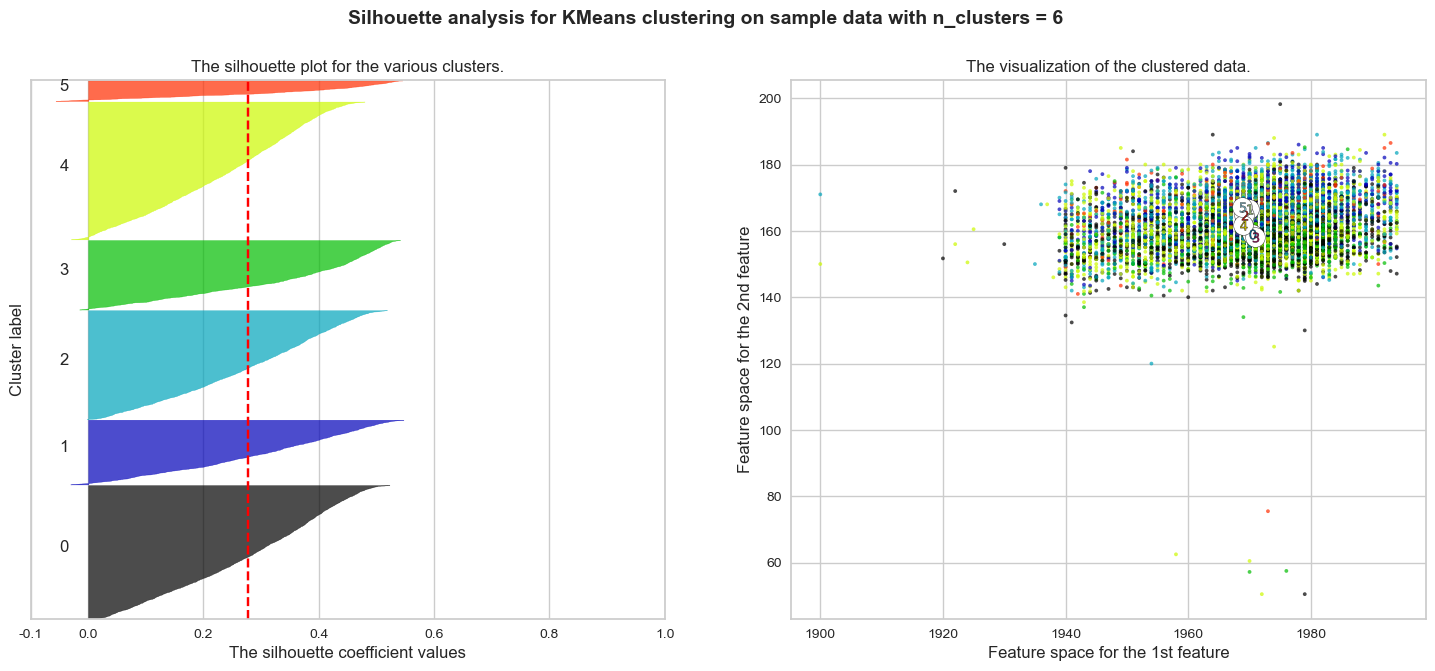

In [4]:
range_n_clusters = [2, 3, 4, 5, 6]
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1] ,marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1],marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')     
    plt.savefig('output1.png', dpi=2000, bbox_inches='tight')


plt.show()